In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown
from mpl_toolkits.mplot3d import Axes3D

picsout_dir = os.path.join(os.getcwd(), "picsout")

if not os.path.exists(picsout_dir):
    raise FileNotFoundError(f"Directory not found: {picsout_dir}")

image_files = [f for f in os.listdir(picsout_dir) if f.endswith('.png')]

if not image_files:
    raise FileNotFoundError("No depth images found in picsout/")


In [2]:
def compute_depth_stats(image_path):
    depth_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    min_depth = np.min(depth_image)
    max_depth = np.max(depth_image)
    mean_depth = np.mean(depth_image)
    variance_depth = np.var(depth_image)

    return min_depth, max_depth, mean_depth, variance_depth, depth_image


In [3]:
selected_image = Dropdown(options=image_files, description="Select Image:")
display(selected_image)

Dropdown(description='Select Image:', options=('demo01.png',), value='demo01.png')

In [4]:
img_path = os.path.join(picsout_dir, selected_image.value)

min_depth, max_depth, mean_depth, variance_depth, depth_img = compute_depth_stats(img_path)

print(f"  Stats for {selected_image.value}:")
print(f"  - Min Depth: {min_depth}")
print(f"  - Max Depth: {max_depth}")
print(f"  - Mean Depth: {mean_depth:.2f}")
print(f"  - Variance: {variance_depth:.2f}\n")


  Stats for demo01.png:
  - Min Depth: 0
  - Max Depth: 255
  - Mean Depth: 126.20
  - Variance: 5473.10



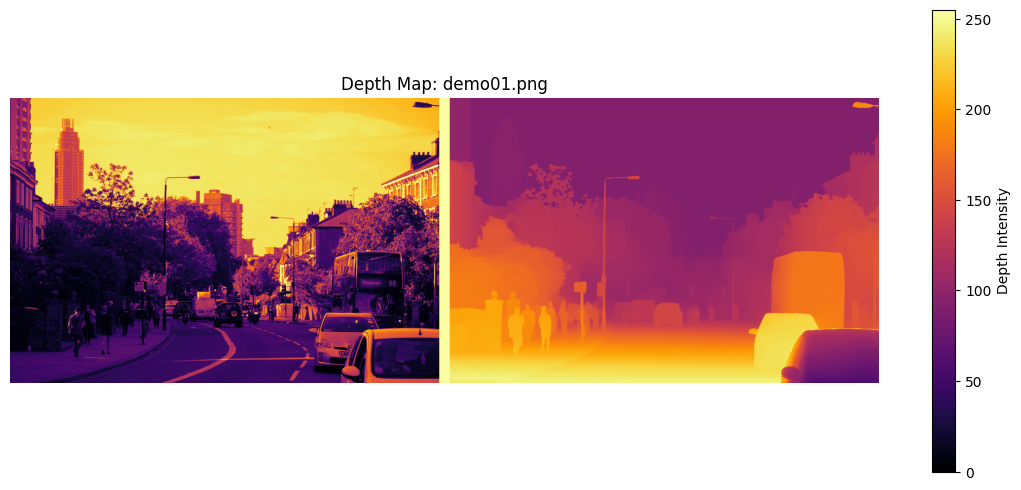

In [5]:
plt.figure(figsize=(14, 6))
plt.imshow(depth_img, cmap='inferno')
plt.colorbar(label="Depth Intensity")
plt.title(f"Depth Map: {selected_image.value}")
plt.axis('off')
plt.show()


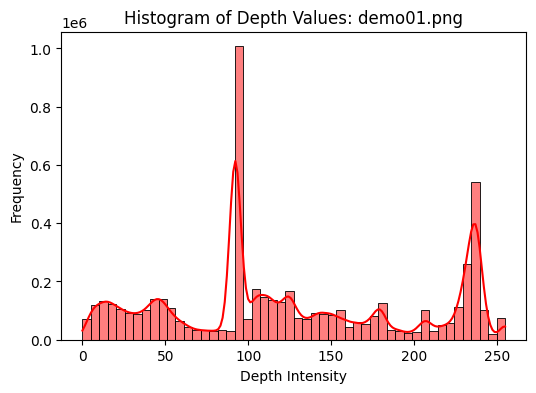

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(depth_img.flatten(), bins=50, kde=True, color='red')
plt.xlabel("Depth Intensity")
plt.ylabel("Frequency")
plt.title(f"Histogram of Depth Values: {selected_image.value}")
plt.show()


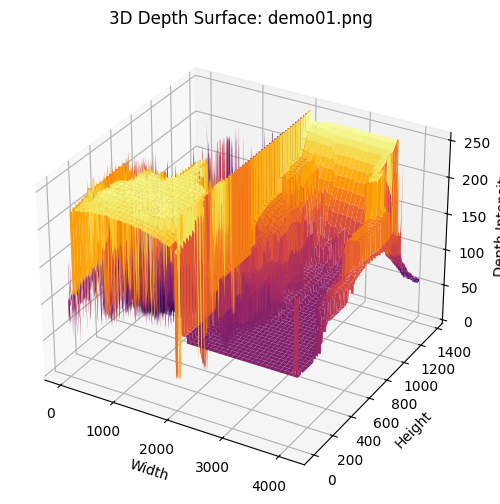

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

h, w = depth_img.shape
X, Y = np.meshgrid(np.arange(w), np.arange(h)) 
ax.plot_surface(X, Y, depth_img, cmap='inferno', edgecolor='none')

ax.set_title(f"3D Depth Surface: {selected_image.value}")
ax.set_xlabel("Width")
ax.set_ylabel("Height")
ax.set_zlabel("Depth Intensity")

plt.show()


In [6]:
import open3d as o3d


def depth_to_point_cloud(depth_map, scale=0.05):
    h, w = depth_map.shape
    y, x = np.meshgrid(np.arange(h), np.arange(w), indexing='ij')
    z = depth_map.astype(np.float32) * scale  # Scale depth values

    points = np.stack((x, y, z), axis=-1).reshape(-1, 3)

    return points

points = depth_to_point_cloud(depth_img)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

o3d.visualization.draw_geometries([pcd])



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
